# Decision Tree for N-dimensional data and labels
The code below implements a decision tree calculated on all the data, for one label depending on several independent variables.

## Libraries
First, some libraries are loaded and global figure settings are made for exporting.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log, e
import pylab

# Figure settings
F = pylab.gcf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Functions

In [134]:
def createClusters(means, covs, npoints):
    """
    Generate `npoints` random points within two clusters characteristed by their `mean` and `diagonal covariance`
    # TODO generalize to return more than two clusters
    """
    x,y=[],[]
    for i in range(len(means)):
        x1,y1=np.random.multivariate_normal(means[i], covs[i], npoints).T
        x.append(np.array(x1))
        y.append(np.array(y1))
    return x,y

# cluster parameters
mean1 = [18, 30]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance
mean2 = [15, 40]
cov2 = [[2, 0], [0, 2]]  # diagonal covariance

means=[mean1,mean2]
covs=[cov1,cov2]
npoints=50

x,y=createClusters(means,covs,npoints)
x[0]

array([ 16.73358046,  18.62934659,  17.84876269,  19.22438261,
        18.01892999,  18.54080171,  16.285953  ,  17.90174184,
        17.38153612,  19.28946645,  18.30943969,  18.5680414 ,
        16.27563381,  19.51308207,  19.38674629,  17.65390348,
        18.94652075,  17.7121735 ,  18.49254733,  16.59211778,
        18.73891008,  16.64420913,  17.29625562,  15.88313778,
        18.67772004,  16.73956545,  18.2409673 ,  17.08594681,
        18.14578441,  18.87933426,  16.82318936,  17.21398961,
        18.01149059,  18.14348554,  17.33033265,  17.41421153,
        19.01945898,  18.56901505,  18.92983688,  18.29415556,
        17.9451527 ,  19.13737354,  17.50071668,  17.46702483,
        17.43575735,  17.99593776,  18.76004021,  15.22838935,
        17.33186005,  19.14552248])

In [155]:
def createTwoClusters(mean1, mean2, cov1, cov2, npoints):
    """
    Generate `npoints` random points within two clusters characteristed by their `mean` and `diagonal covariance`
    # TODO generalize to return more than two clusters
    """
    x1, y1 = np.random.multivariate_normal(mean1, cov1, npoints).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, npoints).T
    return x1, y1, x2, y2


def plotData(clusters):
    """
    Plot the clustered data
    """
    for c in clusters:
        plt.plot(c[:,0], c[:,1], 'x')
    plt.axis('equal')
    plt.grid()
    plt.savefig('/Users/cyrilwendl/Documents/EPFL/Projet SIE/SIE-Project/random_data.pdf', bbox_inches='tight')
    plt.show()


def entropy(labels, base=None):  # [1]
    """
    Calculate the entropy for a set of labels
    """
    value, counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts) / np.log(base)).sum()

def differentialEntropy():
    """
    # TODO implement: Gaussian entropy for continuous variables
    """
    pass
    

def split(index, value, dataset):  # [2]
    """
    split a dataset (columns: variables, rows: data) in two according to some column (index) value 
    """
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def entropy_discrete(dataset, col_index):
    """
    calculate the entropy values for all cuts on one attribute (left<cut, right>=cut).
    
    Parameters
    ----------
    dataset :
        Input array with data and label in rows. The last column contains the labels.
    col_index :
        The index of the column for which the entropy should be computed.
    """
    x_vals, entropy_vals = list(), list()
    uniquevals=(np.unique(dataset[:,col_index]))
    for split_x in uniquevals[1:]:
        x_vals.append(split_x)

        # split
        left, right = split(col_index, split_x, dataset)
        left = np.asarray(left)
        right = np.asarray(right)

        # labels
        left_labels = left[:, -1]  # last column = labels
        right_labels = right[:, -1]

        # entropy
        left_entropy = entropy(left_labels, base=2)
        right_entropy = entropy(right_labels, base=2)

        # total entropy for attribute
        entropy_attr_split = left_entropy * len(left) / len(dataset) + right_entropy * len(right) / len(dataset)
        entropy_vals.append(entropy_attr_split)

    return entropy_vals, x_vals


## Test Data
Next, some data is generated to test the functions above.

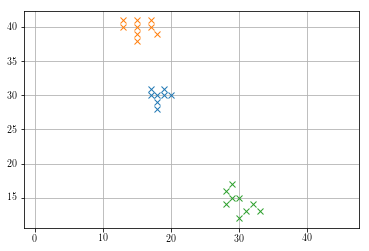

In [164]:
# cluster parameters
npoints=50
means=[[18, 30],[15, 40],[30,15]]
covs=[[[1, 0], [0, 1]],[[2, 0], [0, 2]],[[2, 0], [0, 2]]]
npoints=10

x,y=createClusters(means,covs,npoints)

# zip for having tuples (x,y), round and unique for having discrete coordinates (eliminating duplicate points)
clusters=[]
for i in range(len(x)):
    clusters.append(np.unique(np.round(list(zip(x[i],y[i],np.ones(len(x[i]))*(i+1)))),axis=0)) # np.ones: label 1 for first cluster

# connect unique points of cluster 1 and cluster 2
dataset=np.asarray(np.concatenate(clusters,axis=0))
plotData(clusters)

In [165]:
pd.DataFrame(dataset)

,0,1,2
0,17.0,30.0,1.0
1,17.0,31.0,1.0
2,18.0,28.0,1.0
3,18.0,29.0,1.0
4,18.0,30.0,1.0
5,19.0,30.0,1.0
6,19.0,31.0,1.0
7,20.0,30.0,1.0
8,13.0,40.0,2.0
9,13.0,41.0,2.0


Next, we can calculate the entropy for one given attribute:

In [166]:
dfs=[]#pd.DataFrame(columns=(["x","y"])
entropy_attr=[]
x_attr=[]
attributes=["x","y"]

for attribute_ind in range(np.shape(dataset,)[1]-1):
    entropy_vals_attr, xs_vals_attr = entropy_discrete(col_index=attribute_ind, dataset=dataset)
    x_attr.append(xs_vals_attr)
    entropy_attr.append(np.asarray(entropy_vals_attr))
    
    df=pd.DataFrame(x_attr[attribute_ind], entropy_attr[attribute_ind])
    df.reset_index(inplace=True)
    df.columns=(["entropy","cut value"])
    dfs.append(df)

dfs[1] # y data

,entropy,cut value
0,1.521811,13.0
1,1.384724,14.0
2,1.219590,15.0
3,1.006973,16.0
4,0.866513,17.0
5,0.652213,28.0
6,0.788813,29.0
7,0.849565,30.0
8,0.849565,31.0
9,0.652213,38.0


We now want to get the variable for which the minimum entropy is lowest and make a cut there. Then continue on recursively until all labels are in the same split subarrays.

In [103]:
dfs[0].entropy.min()
min_val=2 # over value range [0,1], min < min_vals will be necessarily true during first evaluation
min_val_cut=np.nan
min_var=np.nan
for i in range(len(dfs)):
    df=dfs[i]
    min_df=df.loc[df['entropy'].argmin()]
    if min_df["entropy"] < min_val:
        min_val = min_df["entropy"] 
        min_val_cut = min_df["cut value"] 
        min_var=i
        
df=pd.DataFrame(["lowest entropy","cut value","variable number"],[min_val,min_val_cut,min_var])
df.columns=["indicator"]
df

,indicator
0.0,lowest entropy
37.0,cut value
1.0,variable number


Now we can iterate the same procedure over the both splitted sides until there is no split left.

In [117]:
# get left (l) and right (r) based on split
# check if labels unique 
# get entropies for all split values in ll rr
# recurse
left,right=split(dataset=dataset,index=min_var,value=min_val_cut)
left
right

[array([ 12.,  37.,   2.]),
 array([ 12.,  40.,   2.]),
 array([ 12.,  41.,   2.]),
 array([ 13.,  39.,   2.]),
 array([ 13.,  40.,   2.]),
 array([ 13.,  41.,   2.]),
 array([ 13.,  42.,   2.]),
 array([ 14.,  39.,   2.]),
 array([ 14.,  40.,   2.]),
 array([ 14.,  41.,   2.]),
 array([ 15.,  38.,   2.]),
 array([ 15.,  39.,   2.]),
 array([ 15.,  40.,   2.]),
 array([ 16.,  39.,   2.]),
 array([ 16.,  41.,   2.]),
 array([ 17.,  38.,   2.]),
 array([ 17.,  39.,   2.]),
 array([ 17.,  40.,   2.]),
 array([ 17.,  41.,   2.]),
 array([ 19.,  41.,   2.])]

# TODO add code for continous entropy calculation